# Peptide on Au or Ag nano-particle surface
#### _Tai-Yu Pan_

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
% matplotlib inline

## Part 1: Water and Ag or Au nano-particle surface
#### Step 1: Add water (`spc216.gro`) to  the system. 
#### Step 2: Energy minimization.

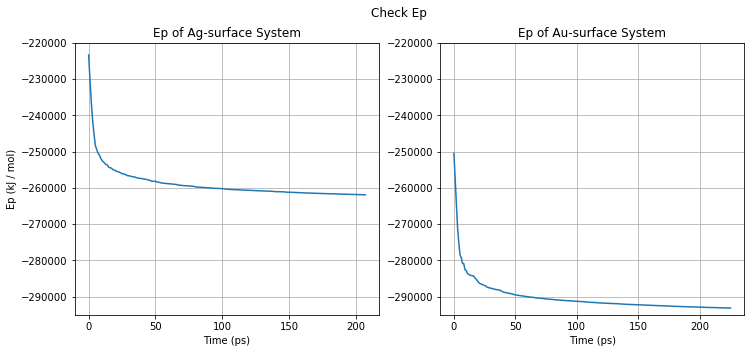

In [2]:
Ag_ep = pd.read_table('Ag_water_em.xvg',skiprows=23, delim_whitespace=True, names = ['Time','EP'])
Au_ep = pd.read_table('Au_water_em.xvg',skiprows=23, delim_whitespace=True, names = ['Time','EP'])
plt.figure(figsize = (12,5))
plt.subplot(121)
plt.plot(Ag_ep.Time, Ag_ep.EP)
plt.title('Ep of Ag-surface System')
plt.xlabel('Time (ps)')
plt.ylabel('Ep (kJ / mol)')
plt.ylim([-295000, -220000])
plt.grid()

plt.subplot(122)
plt.plot(Au_ep.Time, Au_ep.EP)
plt.title('Ep of Au-surface System')
plt.xlabel('Time (ps)')
plt.ylim([-295000, -220000])
plt.grid()

plt.suptitle('Check Ep')

Check Structure | Ag | Au
- | - 
| <img src="Ag_em_structure.png" alt="Drawing" style="width: 500px;"\> | <img src="Au_em_structure.png" alt="Drawing" style="width: 500px;"\>

#### Step 3: NPT to correct water density.
* dt = 0.02 for total 2 ns.
* Pcoupl = berendsen; tau-p = 1.0; ref-p = 1.0; semiisotropic.
* Tcoupl = v-rescale; tau_t = 0.1; ref-t = 300.

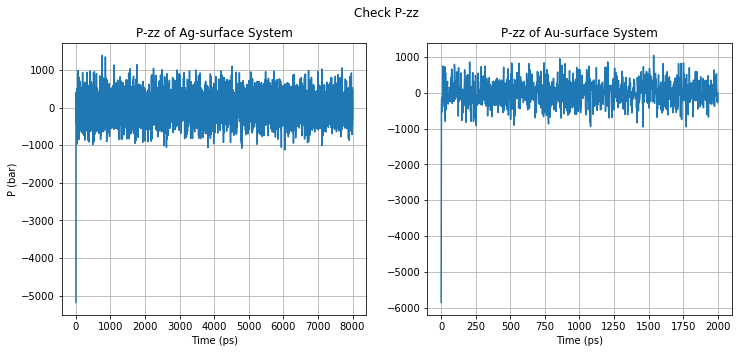

In [3]:
Ag_p = pd.read_table('Ag_wat_npt_p.xvg',skiprows=23, delim_whitespace=True, names = ['Time','P'])
Au_p = pd.read_table('Au_wat_npt_p.xvg',skiprows=23, delim_whitespace=True, names = ['Time','P'])
plt.figure(figsize = (12,5))
plt.subplot(121)
plt.plot(Ag_p.Time, Ag_p.P)
plt.title('P-zz of Ag-surface System')
plt.xlabel('Time (ps)')
plt.ylabel('P (bar)')
plt.grid()

plt.subplot(122)
plt.plot(Au_p.Time, Au_p.P)
plt.title('P-zz of Au-surface System')
plt.xlabel('Time (ps)')
plt.grid()

plt.suptitle('Check P-zz')

#### Step 4: NVT production run.
* dt = 0.02 for total 10 ns.
* Tcoupl = v-rescale; tau_t = 0.1; ref-t = 300.

In [4]:
def hist_water_surface(df, surface, bin_num):
    #get the range of water moleculars
    wat_min = min(
        [ df [df.atom == 'OW'].z.min(), df [df.atom == 'HW1'].z.min(), df [df.atom == 'HW2'].z.min()])
    wat_max = max(
        [ df [df.atom == 'OW'].z.max(), df [df.atom == 'HW1'].z.max(), df [df.atom == 'HW2'].z.max()])
    #check if it remains only surface out of that range
    for index, row in df[ df.z > wat_max ].iterrows():
        assert row.atom == surface; "Wrong!"
    for index, row in df[ df.z < wat_min ].iterrows():
        assert row.atom == surface; "Wrong!"
    #distance between O and the surface
    dist = df[ df.atom == 'OW' ][ df.z >= wat_min ][ df.z <= wat_max ].z - df[ df.z < wat_min].z.max()
    #plot hist
    n, bins, patches = plt.hist(dist, bin_num, edgecolor = 'k', lw = 1.5)
    #put a line on bar
    n_ = np.insert(n, 0, 0)
    n_ = np.append(n_, 0)
    bin_size = (max(bins) - min(bins))/ bin_num
    bin_ = np.insert(bins[0:(len(bins)-1)], 0, min(bins) - bin_size)
    bin_ = np.append(bin_, max(bins) + bin_size)
    plt.plot(bin_, n_, lw = 2.5)
    plt.xlabel('Distance (nm)')
    plt.ylabel('Number of O')
    plt.grid(linestyle = 'dashed')
    title = 'Distance Between O-atom and '+ surface+ '-surface'
    plt.title('Distance Between O-atom and '+ surface+ '-surface')
#    plt.savefig('dis_O_'+ surface +'.png', dpi = 900)
    return n, bins, plt

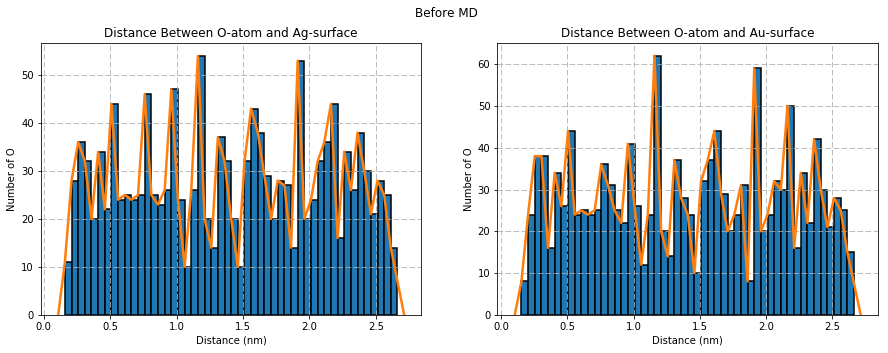

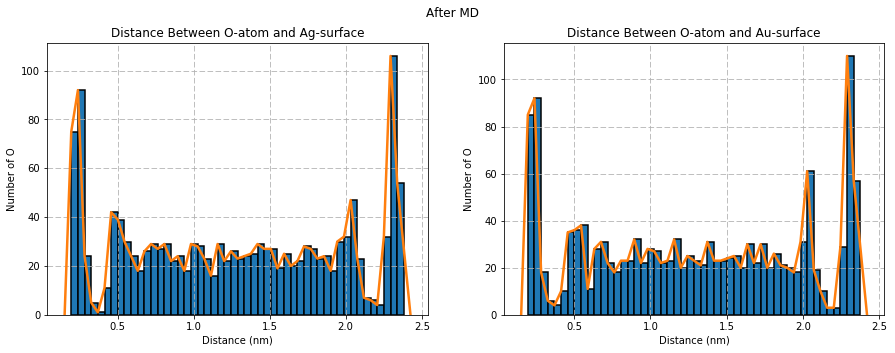

In [5]:
warnings.filterwarnings('ignore')
Ag_wat_init = pd.read_csv('ag_wat_init.gro', skiprows=2, skipfooter=1, delim_whitespace=True, 
                   names = ['residue', 'atom', 'atom_num', 'x', 'y', 'z'])
Au_wat_init = pd.read_csv('au_wat_init.gro', skiprows=2, skipfooter=1, delim_whitespace=True, 
                   names = ['residue', 'atom', 'atom_num', 'x', 'y', 'z'])
Ag_wat_end = pd.read_csv('Ag_wat_confout.gro', skiprows=2, skipfooter=1, delim_whitespace=True, 
                   names = ['residue', 'atom', 'atom_num', 'x', 'y', 'z', 'vx', 'vy', 'vz'])
Au_wat_end = pd.read_csv('Au_wat_confout.gro', skiprows=2, skipfooter=1, delim_whitespace=True, 
                   names = ['residue', 'atom', 'atom_num', 'x', 'y', 'z', 'vx', 'vy', 'vz'])

plt.figure(figsize = (15, 5))
plt.subplot(121)
hist_water_surface(Ag_wat_init, 'Ag', 50)[2]
plt.subplot(122)
hist_water_surface(Au_wat_init, 'Au', 50)[2]
plt.suptitle('Before MD')

plt.figure(figsize = (15, 5))
plt.subplot(121)
hist_water_surface(Ag_wat_end, 'Ag', 50)[2]
plt.subplot(122)
hist_water_surface(Au_wat_end, 'Au', 50)[2]
plt.suptitle('After MD')

### Part 2: Peptide in Water on Au Surface
#### Step 1: Add water (`spc216.gro`) to  the system. 
<img src="files/Au_pep_init.png" alt="Drawing" style="width: 500px";>
#### Step 2: Energy minimization.

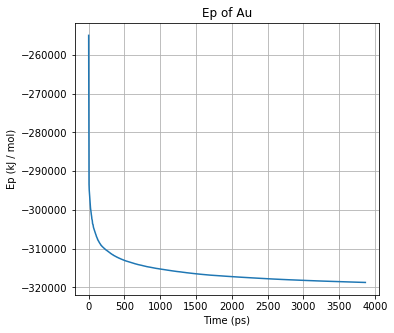

In [6]:
Au_pep_ep = pd.read_table('Au_pep_ep.xvg',skiprows=23, delim_whitespace=True, names = ['Time','EP'])
plt.figure(figsize = (12,5))
plt.subplot(121)
plt.plot(Au_pep_ep.Time, Au_pep_ep.EP)
plt.title('Ep of Au')
plt.xlabel('Time (ps)')
plt.ylabel('Ep (kJ / mol)')
plt.grid()

<img src="files/Au_pep_em.png" alt="Drawing" style="width: 500px";>

#### Step 3: NPT to correct water density.
* dt = 0.02 for total 2 ns.
* Pcoupl = berendsen; tau-p = 1.0; ref-p = 1.0; semiisotropic.
* Tcoupl = v-rescale; tau_t = 0.1; ref-t = 300.

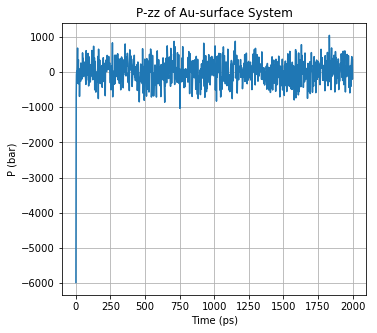

In [8]:
Au_pep_p = pd.read_table('Au_pep_p.xvg',skiprows=23, delim_whitespace=True, names = ['Time','P'])
plt.figure(figsize = (12,5))
plt.subplot(121)
plt.plot(Au_pep_p.Time, Au_pep_p.P)
plt.title('P-zz of Au-surface System')
plt.xlabel('Time (ps)')
plt.ylabel('P (bar)')
plt.grid()

<img src="files/Au_pep_npt.png" alt="Drawing" style="width: 500px";>

#### Step 4: NVT production run.
* dt = 0.02 for total 10 ns.
* Tcoupl = v-rescale; tau_t = 0.1; ref-t = 300.

<img src="files/Au_pep_nvt.png" alt="Drawing" style="width: 500px";>

## Future Work
* Make a movie of peptide, check which residue tends to be attracted by Au-surface.
* Calculate the binding energy, the length of the peptide.
* Complete Ag-surface part.